In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yFkMlfF7375QqsGDONhyK6jVJ5NDgjWpiXhMu-RGHJlv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'carresalevaluepredictionusingml-donotdelete-pr-yatubjyrbfuz2o'
object_key = 'Autos_Data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

    
car= pd.read_csv(body)
car.head()

,Unnamed: 0,company,name,vehicle_type,year,month,gear,fuel_type,ps,kms_driven,damaged,price
0,1,Opel,Opel Insignia 2.8,Kombi,2012,Dec,Automatic,Petrol,325,60000,No,628777
1,2,Opel,Opel Insignia 2.8,Kombi,2011,Sep,Automatic,Petrol,325,90000,No,548171
2,3,Opel,Opel Insignia 2.8,Kombi,2009,May,Manual,Petrol,260,100000,No,466466
3,4,Opel,Opel Insignia 2.8,Kombi,2010,Jun,Manual,Petrol,325,100000,No,526455
4,5,Opel,Opel Insignia 2.8,Kombi,2009,May,Automatic,Petrol,260,125000,No,289388


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56681 entries, 0 to 56680
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    56681 non-null  int64 
 1   company       56681 non-null  object
 2   name          56681 non-null  object
 3   vehicle_type  56681 non-null  object
 4   year          56681 non-null  int64 
 5   month         56681 non-null  object
 6   gear          56681 non-null  object
 7   fuel_type     56681 non-null  object
 8   ps            56681 non-null  int64 
 9   kms_driven    56681 non-null  int64 
 10  damaged       56681 non-null  object
 11  price         56681 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 5.2+ MB


In [4]:
car['price']=car['price'].astype(int)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56681 entries, 0 to 56680
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    56681 non-null  int64 
 1   company       56681 non-null  object
 2   name          56681 non-null  object
 3   vehicle_type  56681 non-null  object
 4   year          56681 non-null  int64 
 5   month         56681 non-null  object
 6   gear          56681 non-null  object
 7   fuel_type     56681 non-null  object
 8   ps            56681 non-null  int64 
 9   kms_driven    56681 non-null  int64 
 10  damaged       56681 non-null  object
 11  price         56681 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 5.2+ MB


In [6]:
car['name']=car['name'].str.replace('_','-')

In [7]:
car['name']

0        Opel Insignia 2.8
1        Opel Insignia 2.8
2        Opel Insignia 2.8
3        Opel Insignia 2.8
4        Opel Insignia 2.8
               ...        
56676      Mercedes Benz C
56677      Mercedes Benz C
56678      Mercedes Benz C
56679      Mercedes Benz C
56680      Mercedes Benz C
Name: name, Length: 56681, dtype: object

In [8]:
car['name']=car['name'].str.split('-').str.slice(0,3)

In [9]:
car['name']=car['name'].str.join(' ')

In [10]:
car['name']

0        Opel Insignia 2.8
1        Opel Insignia 2.8
2        Opel Insignia 2.8
3        Opel Insignia 2.8
4        Opel Insignia 2.8
               ...        
56676      Mercedes Benz C
56677      Mercedes Benz C
56678      Mercedes Benz C
56679      Mercedes Benz C
56680      Mercedes Benz C
Name: name, Length: 56681, dtype: object

In [11]:
car=car.drop('Unnamed: 0', axis=1)

In [12]:
car

,company,name,vehicle_type,year,month,gear,fuel_type,ps,kms_driven,damaged,price
0,Opel,Opel Insignia 2.8,Kombi,2012,Dec,Automatic,Petrol,325,60000,No,628777
1,Opel,Opel Insignia 2.8,Kombi,2011,Sep,Automatic,Petrol,325,90000,No,548171
2,Opel,Opel Insignia 2.8,Kombi,2009,May,Manual,Petrol,260,100000,No,466466
3,Opel,Opel Insignia 2.8,Kombi,2010,Jun,Manual,Petrol,325,100000,No,526455
4,Opel,Opel Insignia 2.8,Kombi,2009,May,Automatic,Petrol,260,125000,No,289388
...,...,...,...,...,...,...,...,...,...,...,...
56676,Mercedes Benz,Mercedes Benz C,Limousine,2008,Jul,Manual,Petrol,184,150000,No,1384156
56677,Mercedes Benz,Mercedes Benz C,Limousine,2009,Apr,Manual,Petrol,184,150000,No,578261
56678,Mercedes Benz,Mercedes Benz C,Limousine,2009,Jul,Manual,Petrol,231,150000,No,345441
56679,Mercedes Benz,Mercedes Benz C,Limousine,2010,Mar,Manual,Petrol,184,150000,No,727248


In [13]:
car.to_csv('Autos_Cleaned_Data.csv')

In [14]:
car.dtypes

company         object
name            object
vehicle_type    object
year             int64
month           object
gear            object
fuel_type       object
ps               int64
kms_driven       int64
damaged         object
price            int64
dtype: object

In [15]:
car

,company,name,vehicle_type,year,month,gear,fuel_type,ps,kms_driven,damaged,price
0,Opel,Opel Insignia 2.8,Kombi,2012,Dec,Automatic,Petrol,325,60000,No,628777
1,Opel,Opel Insignia 2.8,Kombi,2011,Sep,Automatic,Petrol,325,90000,No,548171
2,Opel,Opel Insignia 2.8,Kombi,2009,May,Manual,Petrol,260,100000,No,466466
3,Opel,Opel Insignia 2.8,Kombi,2010,Jun,Manual,Petrol,325,100000,No,526455
4,Opel,Opel Insignia 2.8,Kombi,2009,May,Automatic,Petrol,260,125000,No,289388
...,...,...,...,...,...,...,...,...,...,...,...
56676,Mercedes Benz,Mercedes Benz C,Limousine,2008,Jul,Manual,Petrol,184,150000,No,1384156
56677,Mercedes Benz,Mercedes Benz C,Limousine,2009,Apr,Manual,Petrol,184,150000,No,578261
56678,Mercedes Benz,Mercedes Benz C,Limousine,2009,Jul,Manual,Petrol,231,150000,No,345441
56679,Mercedes Benz,Mercedes Benz C,Limousine,2010,Mar,Manual,Petrol,184,150000,No,727248


In [16]:
import seaborn as sns

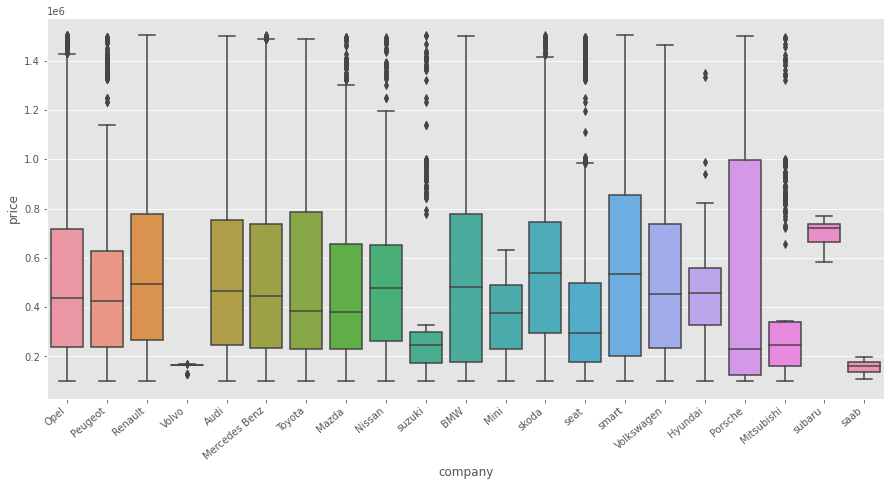

In [17]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

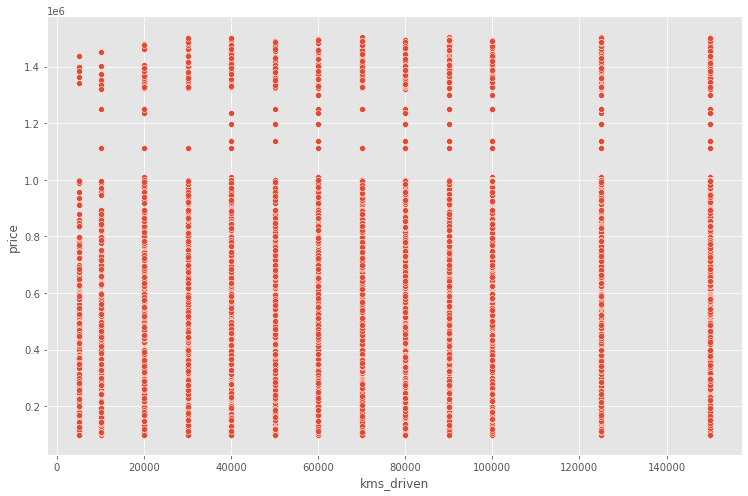

In [18]:
sns.relplot(x='kms_driven',y='price',data=car,height=7,aspect=1.5)

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

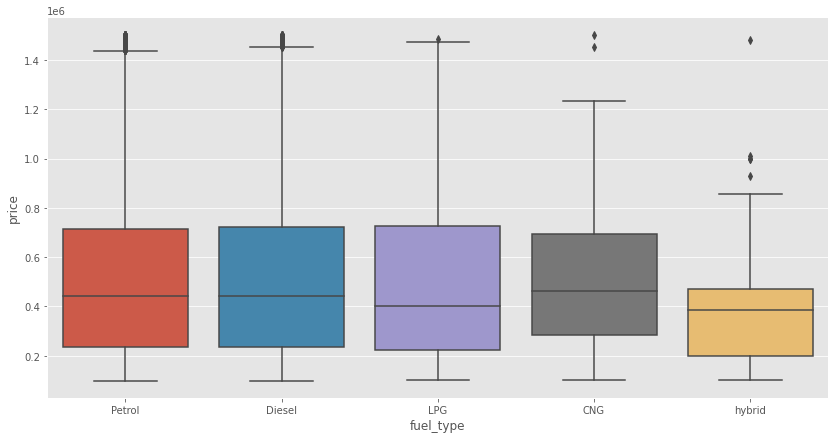

In [19]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='price',data=car)

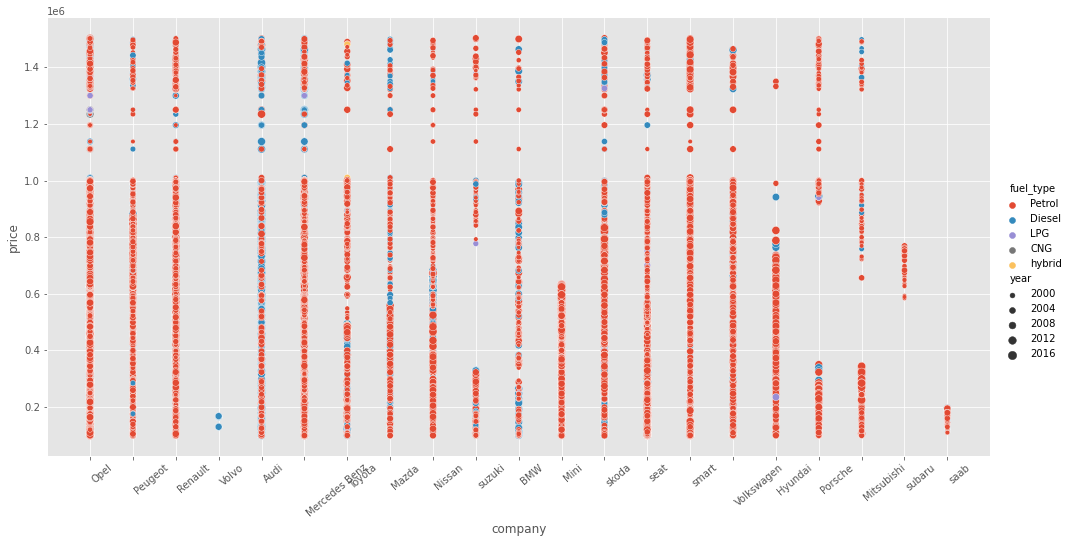

In [20]:
ax=sns.relplot(x='company',y='price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='left')

## Extracting Training Data

In [21]:
x=car[['company','name','vehicle_type','year', 'month', 'gear', 'fuel_type', 'ps', 'kms_driven', 'damaged']]
y=car['price']

In [22]:
x

,company,name,vehicle_type,year,month,gear,fuel_type,ps,kms_driven,damaged
0,Opel,Opel Insignia 2.8,Kombi,2012,Dec,Automatic,Petrol,325,60000,No
1,Opel,Opel Insignia 2.8,Kombi,2011,Sep,Automatic,Petrol,325,90000,No
2,Opel,Opel Insignia 2.8,Kombi,2009,May,Manual,Petrol,260,100000,No
3,Opel,Opel Insignia 2.8,Kombi,2010,Jun,Manual,Petrol,325,100000,No
4,Opel,Opel Insignia 2.8,Kombi,2009,May,Automatic,Petrol,260,125000,No
...,...,...,...,...,...,...,...,...,...,...
56676,Mercedes Benz,Mercedes Benz C,Limousine,2008,Jul,Manual,Petrol,184,150000,No
56677,Mercedes Benz,Mercedes Benz C,Limousine,2009,Apr,Manual,Petrol,184,150000,No
56678,Mercedes Benz,Mercedes Benz C,Limousine,2009,Jul,Manual,Petrol,231,150000,No
56679,Mercedes Benz,Mercedes Benz C,Limousine,2010,Mar,Manual,Petrol,184,150000,No


In [23]:
y.shape

(56681,)

## Applying Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Creating a column transformer to transform categorical columns

In [27]:
ohe=OneHotEncoder()
ohe.fit(x[['company','name','vehicle_type','month', 'gear', 'fuel_type', 'damaged']])

OneHotEncoder()

## Creating a column transformer to transform categorical columns

In [28]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['company','name','vehicle_type','month', 'gear', 'fuel_type', 'damaged']),
                                    remainder='passthrough')

## Linear Regression Model

In [29]:
lr=LinearRegression()

## Making a pipeline

In [30]:
pipe=make_pipeline(column_trans,lr)

## Fitting the model

In [31]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Hyundai', 'Mazda', 'Mercedes Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault',
       'Toyota', 'Volkswagen', 'Volvo', 'saab', 'seat', 'skoda', 'smart',
       'subaru', 'suzuki'], dtype=object),
                                                                            ar...
                                                                            array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Sep'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'LPG', 'Petrol',

In [32]:
y_pred=pipe.predict(x_test)

## Checking R2 Score

In [33]:
r2_score(y_test,y_pred)

0.05803907281681675

### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [34]:
scores=[]
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [35]:
np.argmax(scores)

9

In [36]:
scores[np.argmax(scores)]

0.07292895138004463

## The best model is found at a certain random state

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.07292895138004463

## Test This Model

In [38]:
pipe.predict(pd.DataFrame(columns=['company','name','vehicle_type','year', 'month', 'gear', 'fuel_type', 'ps', 'kms_driven', 'damaged'],data=np.array(['Audi','Audi A3 1.4','Kombi',2015,'Apr','Manual','CNG',100,15000,'No']).reshape(1,10)))

array([522736.7981412])

## Deployment

In [39]:
!pip install -U ibm-watson-machine-learning

In [40]:
from ibm_watson_machine_learning import APIClient

In [41]:
wml_credentials = {
    "apikey":"8MK3A0eyRIQXgHpK0FjRMhfTXdaRMOhiGHVBmySZrQMh",
    "url" : "https://us-south.ml.cloud.ibm.com"
}

In [43]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------------------  ------------------------
ID                                    NAME                          CREATED
c1f9c8ba-771d-45e4-9e5d-07fa59899360  car_resale_value_predicition  2022-11-19T12:38:43.649Z
------------------------------------  ----------------------------  ------------------------


In [44]:
space_id = "c1f9c8ba-771d-45e4-9e5d-07fa59899360"

In [45]:
wml_client.set.default_space(space_id)

'SUCCESS'